In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/semi_cleaned_Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# ==== IMPORTS ====
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer, LabelEncoder
from category_encoders import BinaryEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, classification_report,auc,roc_curve
from sklearn.cluster import KMeans,DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [7]:
num_cols =  df.select_dtypes(include=['int64', 'float64']).columns.drop(['CustomerID'])
bin_cat_cols = ['Gender']
# ord_cat_cols = ['Family_Income']
for col in bin_cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [9]:
# X = df.drop(columns=['CustomerID','Spending Score (1-100)']).copy()
# y = df['Spending Score (1-100)'].copy()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X=df[['Annual Income (k$)','Spending Score (1-100)']]

In [10]:
# X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int32
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


In [13]:
# # # num_cols=df.select_dtypes(include=['int64','int32', 'float64'])
# # num_cols
# %pip install -U scikit-learn


In [14]:
# I will try to make this model to be excuted with gender too

num_cols=df.select_dtypes(include=['int64','int32', 'float64']).columns.drop(['CustomerID','Gender','Age'])
# cat_cols=['Gender']

# Pipelines
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# cat_pipline=Pipeline([
#     ('encoder', BinaryEncoder())
# ])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_cols)
], remainder='drop')

# Model
km = KMeans(n_clusters=5, random_state=42, n_init="auto")
pipe = Pipeline([
    ('preprocessor', transformer),
    ('model', km)
])

df.head()

# num_cols.column
# scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')
# print("Cross-validated R²: %.2f (± %.2f)" % (scores.mean(), scores.std() * 2))

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [16]:
# Fit
X = df.drop(columns=['CustomerID','Gender', 'Age'])
# X=['Annual Income (k$)',
#        'Spending Score (1-100)']
pipe.fit(X)
# X_transformed = transformer.fit_transform(transformer)
inertia = []
K_range = range(1, 15)
X_prepared = transformer.fit_transform(X)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_prepared)
    inertia.append(kmeans.inertia_)


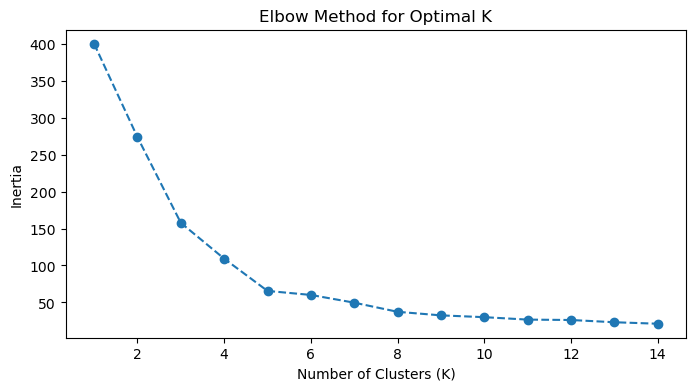

In [17]:
plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, 'o--')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

In [18]:
# Check silhouette scores
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_prepared)
    score = silhouette_score(X_prepared, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")

K=2, Silhouette Score=0.397
K=3, Silhouette Score=0.467
K=4, Silhouette Score=0.494
K=5, Silhouette Score=0.555
K=6, Silhouette Score=0.514
K=7, Silhouette Score=0.502
K=8, Silhouette Score=0.455
K=9, Silhouette Score=0.457
K=10, Silhouette Score=0.445
K=11, Silhouette Score=0.446
K=12, Silhouette Score=0.371
K=13, Silhouette Score=0.383
K=14, Silhouette Score=0.387


In [19]:
# Step 6: Apply K-Means (choose best K from elbow, usually 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_prepared)

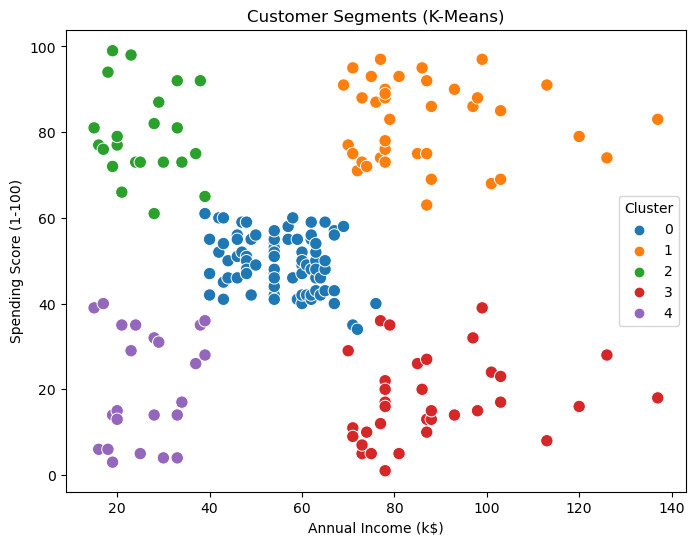

In [20]:
# Step 7: Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Annual Income (k$)'], 
                y=X['Spending Score (1-100)'], 
                hue=df['Cluster'], 
                palette='tab10', s=80)
plt.title("Customer Segments (K-Means)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()

In [21]:
# Step 8: Analyze average spending per cluster
cluster_analysis = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nAverage spending per cluster:")
print(cluster_analysis)


Average spending per cluster:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


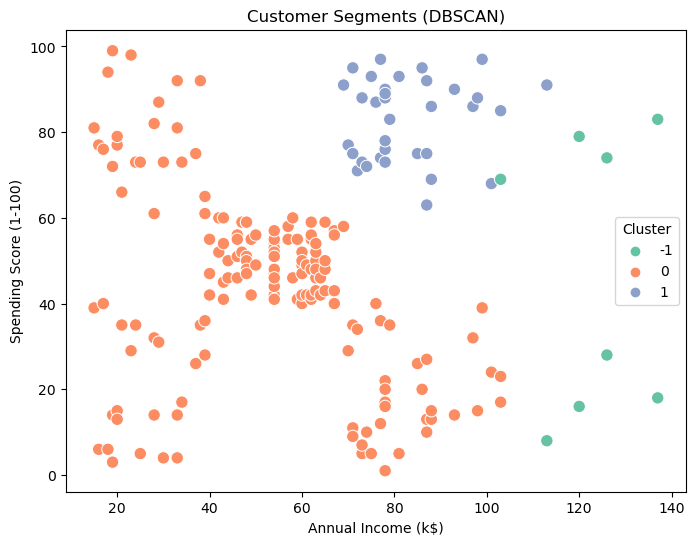

 0    157
 1     35
-1      8
Name: DBSCAN_Cluster, dtype: int64


In [22]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_prepared)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Annual Income (k$)'], 
                y=X['Spending Score (1-100)'], 
                hue=df['DBSCAN_Cluster'], 
                palette='Set2', s=80)
plt.title("Customer Segments (DBSCAN)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()

# Step 9: Compare models
print(df['DBSCAN_Cluster'].value_counts())


In [23]:
# # =====================================
# # 🧩 CUSTOMER SEGMENTATION (K-Means)
# # =====================================

# # Step 1: Import libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans, DBSCAN
# from sklearn.metrics import silhouette_score

# # Step 2: Load dataset
# df = pd.read_csv('../data/semi_cleaned_Mall_Customers.csv')
# print(df.head())

# # Step 3: Select features for clustering
# X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# # Step 4: Feature Scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Step 5: Determine optimal K (Elbow Method)
# inertia = []
# K_range = range(1, 11)
# for k in K_range:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X_scaled)
#     inertia.append(kmeans.inertia_)

# plt.figure(figsize=(8,4))
# plt.plot(K_range, inertia, 'o--')
# plt.title("Elbow Method for Optimal K")
# plt.xlabel("Number of Clusters (K)")
# plt.ylabel("Inertia")
# plt.show()

# # Optional: Check silhouette scores
# for k in range(2, 7):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     labels = kmeans.fit_predict(X_scaled)
#     score = silhouette_score(X_scaled, labels)
#     print(f"K={k}, Silhouette Score={score:.3f}")

# # Step 6: Apply K-Means (choose best K from elbow, usually 5)
# kmeans = KMeans(n_clusters=5, random_state=42)
# df['Cluster'] = kmeans.fit_predict(X_scaled)

# # Step 7: Visualize clusters
# plt.figure(figsize=(8,6))
# sns.scatterplot(x=X['Annual Income (k$)'], 
#                 y=X['Spending Score (1-100)'], 
#                 hue=df['Cluster'], 
#                 palette='tab10', s=80)
# plt.title("Customer Segments (K-Means)")
# plt.xlabel("Annual Income (k$)")
# plt.ylabel("Spending Score (1-100)")
# plt.legend(title="Cluster")
# plt.show()

# # Step 8: Analyze average spending per cluster
# cluster_analysis = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
# print("\nAverage spending per cluster:")
# print(cluster_analysis)

# # =====================================
# # 🧩 BONUS: DBSCAN CLUSTERING
# # =====================================
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# plt.figure(figsize=(8,6))
# sns.scatterplot(x=X['Annual Income (k$)'], 
#                 y=X['Spending Score (1-100)'], 
#                 hue=df['DBSCAN_Cluster'], 
#                 palette='Set2', s=80)
# plt.title("Customer Segments (DBSCAN)")
# plt.xlabel("Annual Income (k$)")
# plt.ylabel("Spending Score (1-100)")
# plt.legend(title="Cluster")
# plt.show()

# # Step 9: Compare models
# print(df['DBSCAN_Cluster'].value_counts())
